## Домашнее задание 9 ##
### Это задание выполнено Павлом Овчинниковым при обучении на курсе "Теория вероятностей и математическая статистика" ###
### Преподаватель Дамир Тлеубаев ###

## Задание 1)  
### Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.
## Решение: 
###  Полагаем, что величины имеют линейную зависимость (хотя график $ y = ks(zp) $ мне больше напоминает график $ y=\sqrt{x} $), тогда уравнение регрессии $ \overline {ks} = β_1+β_0\overline{zp} $, где $ β_0 = r \frac{σ_{ks}}{σ_{zp}}, $ и intercept $ β_1 = \overline {ks}-β_0*\overline {zp} $

In [8]:
import pandas as pd
import numpy as np

zp=np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks=np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

zp_avg = np.mean(zp)
ks_avg = np.mean(ks)

β_0 = np.corrcoef(zp, ks)[0][1]*np.std(ks)/np.std(zp)
β_1 = ks_avg - β_0*zp_avg

print(f'Коэффициент линейной регресии равен {β_0}') 
print(f'Коэффициент intercept равен {β_1}')
print(f'Уравнение прямой Y = {β_1}+{β_0}*X')

Коэффициент линейной регресии равен 2.6205388824027644
Коэффициент intercept равен 444.17735732435966
Уравнение прямой Y = 444.17735732435966+2.6205388824027644*X


### Расчет Коэффициента линейной регресии без intercept $ \overline {ks} = β_0\overline{zp} $. Рассчитаем с помощью функций Python:

In [3]:
import numpy as np 
from sklearn.linear_model import LinearRegression

zp=np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks=np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

model = LinearRegression(fit_intercept=False) # определяем регрессионную модель, fit_intercept=False - точку пересечения считаем равной нулю
zp = zp.reshape(-1, 1) # развернули строку в столбец
regres =  model.fit(zp, ks) # .fit() вычисляет оптимальные значения коэффициентов

β_1 = regres.intercept_
β_0 = regres.coef_

print('intercept:', regres.intercept_)
print('Коэффициент наклона :', regres.coef_)

intercept: 0.0
Коэффициент наклона : [5.88982042]


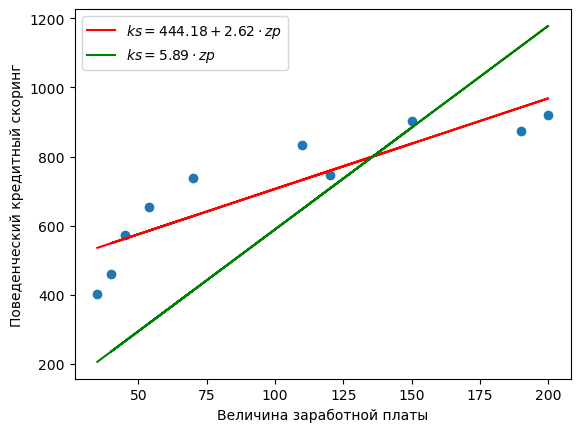

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(zp,ks)
plt.plot(zp, 444.18+2.62*zp, c='r', label=r'$ks=444.18+2.62\cdot zp$')
plt.plot(zp, 5.89*zp, c='g', label=r'$ks=5.89\cdot zp$')
plt.legend()
plt.xlabel('Величина заработной платы')
plt.ylabel('Поведенческий кредитный скоринг', rotation=90)
plt.show()

### Честно скажу, мне не понятно, что показывает функция без intercept. От апроксимации данных zp(ks) линия очень далека. Чтение доп.литературы не помогло :( https://www.codecamp.ru/blog/intercept-in-regression/

______________________________________________________________________________
## Задание 2) 
###  Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).
### Решение: 

In [12]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plot

zp=np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks=np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

def mse_(B1, y=ks, x=zp, n=len(zp)): # среднеквадратичная ошибка
    return np.sum(B1*x-y)**2/n

alpha = 1e-6
B1=0.1
n=len(zp)
y=ks
x=zp

for i in range (1600):
    B1 -= alpha*(2/n)*np.sum((B1*x-y)*x)
    if i%200 == 0:
        print(f'Итерация = {i}; B1={B1}; mse={mse_}'.format(i=i, B1=B1, mse=mse_(B1)))

Итерация = 0; B1=0.25952808; mse=<function mse_ at 0x53dea58>
Итерация = 200; B1=5.868748638669329; mse=<function mse_ at 0x53dea58>
Итерация = 400; B1=5.8897415574471985; mse=<function mse_ at 0x53dea58>
Итерация = 600; B1=5.889820124983314; mse=<function mse_ at 0x53dea58>
Итерация = 800; B1=5.88982041902807; mse=<function mse_ at 0x53dea58>
Итерация = 1000; B1=5.8898204201285544; mse=<function mse_ at 0x53dea58>
Итерация = 1200; B1=5.889820420132673; mse=<function mse_ at 0x53dea58>
Итерация = 1400; B1=5.889820420132673; mse=<function mse_ at 0x53dea58>


_________________________________________________________________________
## Задание 3) 
### Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).
### Решение: 

In [13]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plot

zp=np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks=np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

model=LinearRegression() #задаем модель

zp = zp.reshape(-1, 1) # делаем массив двумерным со столбцом

regres = model.fit(zp, ks) # ПОДБИРАЕМ КОЭФФИЦИЕНТЫ
print(regres.intercept_) # выводим intercept
print(regres.coef_) # выводим intercept
# print(regres.score(zp, ks))

444.1773573243596
[2.62053888]


### Полчили тот же результат, что и в Задаче 1.
### PS Использованы материалы лекции и статья "Линейная регрессия в Python" автор Вадим В. Костерин- https://chelcenter.susu.ru/chel-center.ru/python-yfc/2020/12/20/linejnaya-regressiya-v-python/index.html